In [1]:
%load_ext lab_black

In [84]:
import pandas as pd
import plotly.graph_objects as go
import requests
import json
import glob
import datetime
import plotly.express as px
from config import api_key
from config import mapbox_token
from calendar import monthrange


# Data pulled from U.S. Fish & Wildlife Service
# https://ecos.fws.gov/ecp/report/species-listings-by-tax-group?statusCategory=Listed&groupName=Birds
endangered_bird_data_to_load = "Resources/endangered_birds.csv"
endangered_birds_df = pd.read_csv(endangered_bird_data_to_load)

recent_bird_sightings_to_load = "Resources/recent_bird_sightings.csv"
recent_bird_sighting_df = pd.read_csv(recent_bird_sightings_to_load)

autumn_birds_us_to_load = "Resources/birds_usa.csv"
birds_usa_df = pd.read_csv(autumn_birds_us_to_load)

In [37]:
# Number of endangered bird that can be found in each US Fish and Wildlife Service Region.
endangered_df["Region  "].value_counts()

1    50
4    22
2    12
8    10
7     4
5     3
6     1
3     1
Name: Region  , dtype: int64

In [4]:
states = [
    ["Washington", 1],
    ["Oregon", 1],
    ["Idaho", 1],
    ["Hawaii", 1],
    ["Montana", 6],
    ["Wyoming", 6],
    ["Utah", 6],
    ["Colorado", 6],
    ["North Dakota", 6],
    ["South Dakota", 6],
    ["Nebraska", 6],
    ["Kansas", 6],
    ["Minnesota", 3],
    ["Iowa", 3],
    ["Missouri", 3],
    ["Wisconsin", 3],
    ["Illinois", 3],
    ["Indian", 3],
    ["Michigan", 3],
    ["Ohio", 3],
    ["Virginia", 5],
    ["West Virginia", 5],
    ["Maryland", 5],
    ["Delaware", 5],
    ["Pennsylvania", 5],
    ["New York", 5],
    ["New Jersey", 5],
    ["Connecticut", 5],
    ["Rhode Island", 5],
    ["Massachusetts", 5],
    ["Vermont", 5],
    ["New Hampshire", 5],
    ["Maine", 5],
    ["Florida", 4],
    ["Georgia", 4],
    ["South Carolina", 4],
    ["North Carolina", 4],
    ["Alabama", 4],
    ["Mississippi", 4],
    ["Louisianna", 4],
    ["Arkansas", 4],
    ["Tennessee", 4],
    ["Texas", 2],
    ["Oklahoma", 2],
    ["New Mexico", 2],
    ["Arizona", 2],
    ["Alaska", 7],
    ["California", 7],
    ["Nevada", 7],
    ["Kentucky", 7],
]
states_df = pd.DataFrame(states, columns=["State", "Region"])
states_df

State  Region
0       Washington       1
1           Oregon       1
2            Idaho       1
3           Hawaii       1
4          Montana       6
5          Wyoming       6
6             Utah       6
7         Colorado       6
8     North Dakota       6
9     South Dakota       6
10        Nebraska       6
11          Kansas       6
12       Minnesota       3
13            Iowa       3
14        Missouri       3
15       Wisconsin       3
16        Illinois       3
17          Indian       3
18        Michigan       3
19            Ohio       3
20        Virginia       5
21   West Virginia       5
22        Maryland       5
23        Delaware       5
24    Pennsylvania       5
25        New York       5
26      New Jersey       5
27     Connecticut       5
28    Rhode Island       5
29   Massachusetts       5
30         Vermont       5
31   New Hampshire       5
32           Maine       5
33         Florida       4
34         Georgia       4
35  South Carolina       4
36  North Carolina       4
37         Alabama       4
38     Mississippi       4
39      Louisianna       4
40        Arkansas       4
41       Tennessee       4
42           Texas       2
43        Oklahoma       2
44      New Mexico       2
45         Arizona       2
46          Alaska       7
47      California       7
48          Nevada       7
49        Kentucky       7

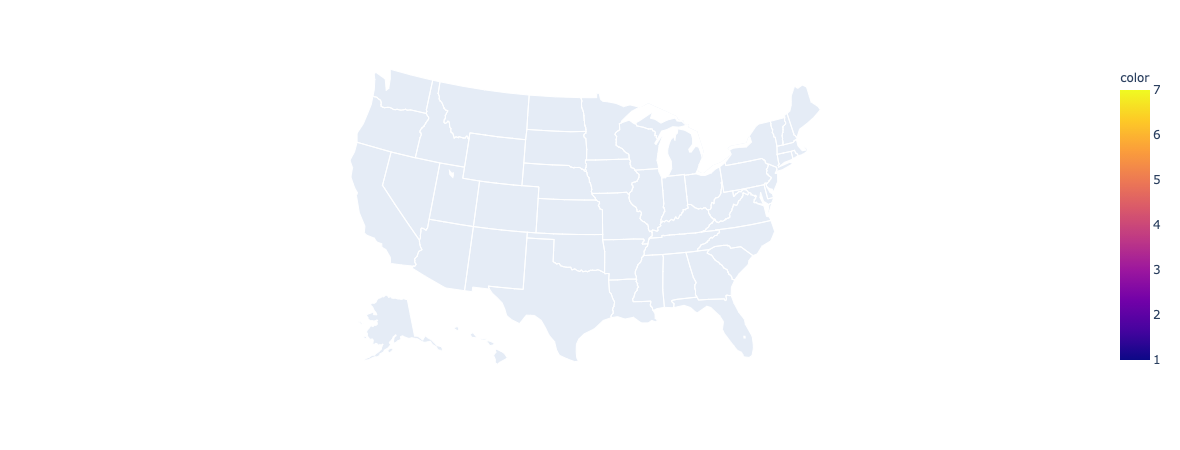

In [5]:
fig = px.choropleth(
    locations=states_df["State"],
    locationmode="USA-states",
    color=states_df["Region"],
    scope="usa",
)
fig.show()

### Requesting all bird sightings in the US that have been logged over the last 7 days.
#### This data will be merged with endangered species list to show only the birds that are listed as endangered or threatened.

regionCode = "US"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/recent"

r = requests.get(url, params={"key": api_key, "back": 7})

r.url

r.status_code

data = r.json()

# This is the recent sightings DataFrame
recent_birds_df = pd.DataFrame(data)
recent_birds_df.to_csv("Recent_Bird_Sightings.csv")

In [43]:
# Merging endangered bird DataFrame with recent sightings DataFrame
endangered_recent_df = endangered_df.merge(
    recent_birds_df, left_on="Scientific Name", right_on="sciName"
)
endangered_recent_df.fillna(1, inplace=True)
endangered_recent_df

Scientific Name             Common Name  \
0    Gymnogyps californianus       California condor   
1    Gymnogyps californianus       California condor   
2             Grus americana          Whooping crane   
3             Grus americana          Whooping crane   
4             Grus americana          Whooping crane   
5             Grus americana          Whooping crane   
6            Anas wyvilliana  Hawaiian (=koloa) Duck   
7   Pterodroma sandwichensis         Hawaiian petrel   
8         Mycteria americana              Wood stork   
9         Charadrius melodus           Piping Plover   
10        Charadrius melodus           Piping Plover   
11   Aphelocoma coerulescens       Florida scrub-jay   
12  Brachyramphus marmoratus        Marbled murrelet   
13       Coccyzus americanus    Yellow-billed Cuckoo   
14         Drepanis coccinea                  `I`iwi   

                                         Where Listed  Region    \
0   U.S.A. only, except where listed as an experim...         8   
1   U.S.A. (specific portions of Arizona, Nevada, ...         8   
2   Wherever found, except where listed as an expe...         2   
3   U.S.A. (CO, ID, FL, NM, UT, and the western ha...         4   
4   U.S.A. (AL, AR, CO, FL, GA, ID, IL, IN, IA, KY...         2   
5                      U.S.A (Southwestern Louisiana)         4   
6                                      Wherever found         1   
7                                      Wherever found         1   
8                              AL, FL, GA, MS, NC, SC         4   
9   [Great Lakes watershed DPS] - Great Lakes, wat...         3   
10  [Atlantic Coast and Northern Great Plains popu...         5   
11                                     Wherever found         4   
12                                U.S.A. (CA, OR, WA)         1   
13                                   Western U.S. DPS         2   
14                                     Wherever found         1   

                      ESA Listing Status   speciesCode               comName  \
0                               Endangered      calcon     California Condor   
1   Experimental Population, Non-Essential      calcon     California Condor   
2                               Endangered      whocra        Whooping Crane   
3   Experimental Population, Non-Essential      whocra        Whooping Crane   
4   Experimental Population, Non-Essential      whocra        Whooping Crane   
5   Experimental Population, Non-Essential      whocra        Whooping Crane   
6                               Endangered      hawduc         Hawaiian Duck   
7                               Endangered     hawpet1       Hawaiian Petrel   
8                               Threatened      woosto            Wood Stork   
9                               Endangered      pipplo         Piping Plover   
10                              Threatened      pipplo         Piping Plover   
11                              Threatened      flsjay     Florida Scrub-Jay   
12                              Threatened      marmur      Marbled Murrelet   
13                              Threatened      yebcuc  Yellow-billed Cuckoo   
14                              Threatened        iiwi                  Iiwi   

                     sciName      locId  \
0    Gymnogyps californianus    L851680   
1    Gymnogyps californianus    L851680   
2             Grus americana  L12371400   
3             Grus americana  L12371400   
4             Grus americana  L12371400   
5             Grus americana  L12371400   
6            Anas wyvilliana   L1169080   
7   Pterodroma sandwichensis   L7991696   
8         Mycteria americana   L2437906   
9         Charadrius melodus    L127422   
10        Charadrius melodus    L127422   
11   Aphelocoma coerulescens    L278595   
12  Brachyramphus marmoratus  L12375405   
13       Coccyzus americanus  L12397414   
14         Drepanis coccinea    L880981   

                                              locName             obsDt  

In [44]:
# Setting MapBox token.
px.set_mapbox_access_token(mapbox_token)

In [68]:
# Generating scatter map.
fig = px.scatter_mapbox(
    endangered_recent_df,
    lat="lat",
    lon="lng",
    color="howMany",
    hover_data=["Common Name", "Scientific Name", "Where Listed", "locName"],
    title="Endangered Bird Species Sitings in the United States (Last 7 Days)",
    height=750,
    mapbox_style="stamen-terrain",
    zoom=1.8,
    animation_frame="obsDt",
)

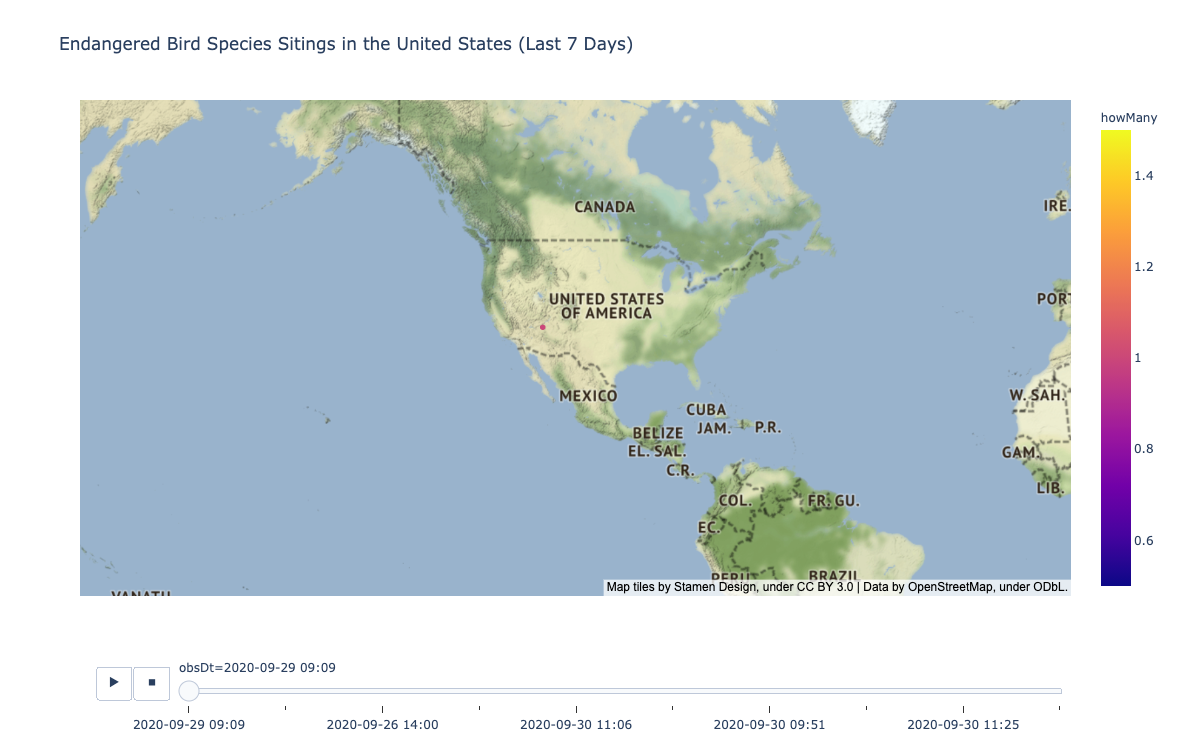

In [69]:
fig.show()

### Sightings for the birds in the endangered species list (sited in the last 7 days) in the state they were observed over several years.

#### (Requesting Data to determine the number of sightings for all birds that have been observed in the states indicated above.)

# List of years to plug into API request
year_list = ["2020", "2019", "2018", "2017", "2016", "2015", "2010", "2005", "2000"]

def extract_data(data):
    return {
        "Common Name": data.get("comName"),
        "Scientific Name": data.get("sciName"),
        "Date Sighted": data.get("obsDt"),
        "Location Name": data.get("locName"),
        "Num Sighted": data.get("howMany"),
        "Latitude": data.get("lat"),
        "Longitude": data.get("lng"),
    }

# Use this code to creat csv files for each state with endagered birds sited on date.
year_results = []
regionCode = "US-SC"
year = []
month = "9"
day = "22"

print("Beginning Data Retrieval")
print("----------------------------------------")

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            print(bird)
            pass

sc_df = pd.DataFrame(year_results)
sc_df.fillna(1, inplace=True)
sc_df.to_csv("south_carolina_sightings.csv")

In [76]:
# Combining all CSVs that include the all of the bird sitings in the states that reported endangered bird sitings in the past 7 days. I picked the first day of Autumnfor each year indicated in year_list.
path = "Resources/Endangered_State_Files"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

birds_states_df = pd.concat(li, axis=0, ignore_index=True)

In [77]:
birds_states_df

Unnamed: 0             Common Name           Scientific Name  \
0              0        Great Horned Owl          Bubo virginianus   
1              1            Gray Catbird    Dumetella carolinensis   
2              2       Northern Cardinal     Cardinalis cardinalis   
3              3           Mourning Dove          Zenaida macroura   
4              4           Chimney Swift         Chaetura pelagica   
...          ...                     ...                       ...   
8953        1867           American Crow     Corvus brachyrhynchos   
8954        1868    Violet-green Swallow    Tachycineta thalassina   
8955        1869            Bank Swallow           Riparia riparia   
8956        1870           Cliff Swallow  Petrochelidon pyrrhonota   
8957        1871  Golden-crowned Sparrow   Zonotrichia atricapilla   

          Date Sighted               Location Name  Num Sighted   Latitude  \
0     2020-09-22 20:05                 Mingo Point          1.0  32.596322   
1     2020-09-22 19:15  The Parkway Retention Pond          4.0  34.865668   
2     2020-09-22 19:15  The Parkway Retention Pond          2.0  34.865668   
3     2020-09-22 19:09                 Kenwood Ave          1.0  34.382002   
4     2020-09-22 19:09                 Kenwood Ave         17.0  34.382002   
...                ...                         ...          ...        ...   
8953        2000-09-22          Yakima River Delta          1.0  46.240657   
8954        2000-09-22          Yakima River Delta          1.0  46.240657   
8955        2000-09-22          Yakima River Delta          2.0  46.240657   
8956        2000-09-22          Yakima River Delta          1.0  46.240657   
8957        2000-09-22     Mt. Rainier NP--Sunrise          1.0  46.914966   

       Longitude  year  
0     -80.131313  2020  
1     -82.260447  2020  
2     -82.260447  2020  
3     -80.074357  2020  
4     -80.074357  2020  
...          ...   ...  
8953 -119.235578  2000  
8954 -119.235578  2000  
8955 -119.235578  2000  
8956 -119.235578  2000  
8957 -121.640653  2000  

[8958 rows x 9 columns]

In [78]:
# List of birds (scientific name) that have been seen in the US over the last 7 days.
endangered_list = endangered_recent_df["Scientific Name"].to_list()
endangered_list_unique = list(set(endangered_list))
endangered_list_unique

['Drepanis coccinea',
 'Grus americana',
 'Brachyramphus marmoratus',
 'Coccyzus americanus',
 'Gymnogyps californianus',
 'Anas wyvilliana',
 'Charadrius melodus',
 'Aphelocoma coerulescens',
 'Pterodroma sandwichensis',
 'Mycteria americana']

## Endangered bird sitings for the states that reported endagered bird sightings in the past seven days

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)

In [79]:
endangered_bird_states_df = birds_states_df[
    birds_states_df["Scientific Name"].isin(endangered_list_unique)
]
endangered_bird_states_df

Unnamed: 0           Common Name           Scientific Name  \
111          111  Yellow-billed Cuckoo       Coccyzus americanus   
118          118            Wood Stork        Mycteria americana   
149          149         Piping Plover        Charadrius melodus   
208          208            Wood Stork        Mycteria americana   
332          332  Yellow-billed Cuckoo       Coccyzus americanus   
...          ...                   ...                       ...   
8094        1008      Marbled Murrelet  Brachyramphus marmoratus   
8271        1185      Marbled Murrelet  Brachyramphus marmoratus   
8504        1418      Marbled Murrelet  Brachyramphus marmoratus   
8708        1622      Marbled Murrelet  Brachyramphus marmoratus   
8844        1758      Marbled Murrelet  Brachyramphus marmoratus   

          Date Sighted                                      Location Name  \
111   2020-09-22 15:30                                 Saluda Shoals Park   
118   2020-09-22 14:42                                              House   
149   2020-09-22 12:01                                Huntington Beach SP   
208   2019-09-22 19:31                        SC Berkeley Sweetwater yard   
332   2019-09-22 10:43  Collums Millpond 543 Edisto Lake Road, Wagener...   
...                ...                                                ...   
8094  2017-09-22 15:42   5557 Maple Way, Blaine US-WA (48.8863,-122.7864)   
8271  2016-09-22 16:30                                          Ediz Hook   
8504  2015-09-22 17:00                       Charles Richey Sr. Viewpoint   
8708  2010-09-22 13:00              Lighthouse Marine Park, Point Roberts   
8844        2005-09-22                                      Yellow Island   

      Num Sighted   Latitude   Longitude  year  
111           1.0  34.048615  -81.182935  2020  
118          31.0  32.707533  -79.956726  2020  
149           3.0  33.508300  -79.065900  2020  
208           1.0  32.897865  -79.911519  2019  
332           1.0  33.679185  -81.335949  2019  
...           ...        ...         ...   ...  
8094          2.0  48.886278 -122.786364  2017  
8271          2.0  48.140350 -123.447110  2016  
8504          1.0  47.572654 -122.414019  2015  
8708          4.0  48.972242 -123.083671  2010  
8844         23.0  48.592257 -123.030402  2005  

[88 rows x 9 columns]

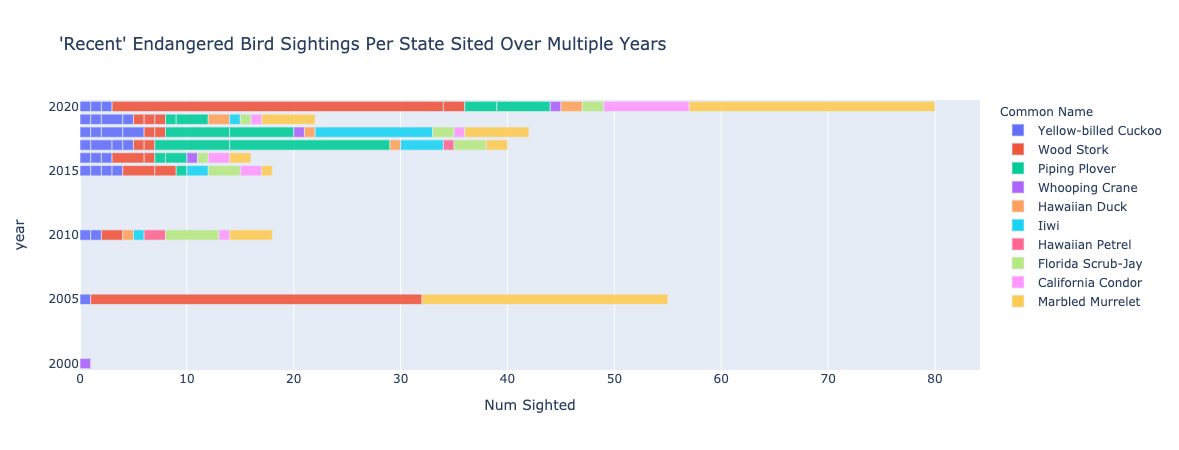

In [80]:
barchart = px.bar(
    endangered_bird_states_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="'Recent' Endangered Bird Sightings Per State Sited Over Multiple Years",
)
barchart

![Autumn Bird](Resources/Images/Autumn_Bird.png)

### Pulling Bird Sightings across the entire US on the first day of Autumn and Filtering DataFrame to show only Endangered Bird Sitings

year_results = []
regionCode = "US"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

birds_usa_df = pd.DataFrame(year_results)

In [91]:
birds_usa_df.fillna(1, inplace=True)
birds_usa_df

Unnamed: 0             Common Name            Scientific Name  \
0              0     Eastern Screech-Owl             Megascops asio   
1              1    Black-bellied Plover       Pluvialis squatarola   
2              2           shorebird sp.        Charadriiformes sp.   
3              3          Eastern Phoebe            Sayornis phoebe   
4              4        Common Nighthawk           Chordeiles minor   
...          ...                     ...                        ...   
6492        6492    Prothonotary Warbler        Protonotaria citrea   
6493        6493   Black-headed Grosbeak  Pheucticus melanocephalus   
6494        6494          Lazuli Bunting           Passerina amoena   
6495        6495         Painted Bunting            Passerina ciris   
6496        6496  Yellow-billed Cardinal          Paroaria capitata   

          Date Sighted                              Location Name  \
0     2020-09-22 23:54                       Sommer Park Preserve   
1     2020-09-22 23:46                   Park Point--Sailing Club   
2     2020-09-22 23:46                   Park Point--Sailing Club   
3     2020-09-22 23:46                   Park Point--Sailing Club   
4     2020-09-22 23:45                             Stewart Corner   
...                ...                                        ...   
6492        2000-09-22                     Leesylvania State Park   
6493        2000-09-22                               Mt. Davidson   
6494        2000-09-22     Desert NWR--Corn Creek (Field Station)   
6495        2000-09-22  ULL Experimental Farm (restricted access)   
6496        2000-09-22                      Mauna Kea Golf Course   

      Num Sighted   Latitude   Longitude  year  
0             1.0  40.411375  -74.775610  2020  
1             8.0  46.731676  -92.056176  2020  
2             1.0  46.731676  -92.056176  2020  
3             3.0  46.731676  -92.056176  2020  
4             1.0  41.899314  -79.655270  2020  
...           ...        ...         ...   ...  
6492          1.0  38.589809  -77.251745  2000  
6493          2.0  37.738370 -122.453399  2000  
6494          1.0  36.438797 -115.359566  2000  
6495          5.0  30.093489  -91.870032  2000  
6496          1.0  20.011036 -155.817204  2000  

[6497 rows x 9 columns]

In [92]:
# Creating a list of all of the birds that are classified as endangered by the US Dept. of Fish and Wildlife Services.
endangered_usa_list = endangered_df["Scientific Name"].to_list()

In [93]:
# Filtering DataFrame to show only birds that are on the endangered list.
endangered_usa_fall_df = birds_usa_df[
    birds_usa_df["Scientific Name"].isin(endangered_usa_list)
]
endangered_usa_fall_df

Unnamed: 0           Common Name           Scientific Name  \
355          355  Yellow-billed Cuckoo       Coccyzus americanus   
376          376            Wood Stork        Mycteria americana   
421          421         Piping Plover        Charadrius melodus   
546          546     California Condor   Gymnogyps californianus   
576          576      Marbled Murrelet  Brachyramphus marmoratus   
...          ...                   ...                       ...   
6013        6013     California Condor   Gymnogyps californianus   
6046        6046            Wood Stork        Mycteria americana   
6163        6163      Marbled Murrelet  Brachyramphus marmoratus   
6394        6394  Yellow-billed Cuckoo       Coccyzus americanus   
6419        6419        Whooping Crane            Grus americana   

          Date Sighted                                      Location Name  \
355   2020-09-22 18:39                                        Woodman Fen   
376   2020-09-22 18:32            Cumberland Island, High Point (PRIVATE)   
421   2020-09-22 18:20           Galveston--8 mile Beach/Sunny Beach area   
546   2020-09-22 17:14                     Glen Canyon NRA--Navajo Bridge   
576   2020-09-22 16:54                           Boiler Bay State Wayside   
...                ...                                                ...   
6013        2005-09-22                    California - Monterey - Big Sur   
6046  2000-09-22 18:15                           Big Black River and I-20   
6163  2000-09-22 14:45  Glacier Bay NP--Icy Strait (@mouth of Glacier ...   
6394  2000-09-22 06:20                      Cape Island--Higbee Beach WMA   
6419        2000-09-22                                    Three Lakes WMA   

      Num Sighted   Latitude   Longitude  year  
355           1.0  39.730677  -84.126048  2020  
376           5.0  30.915645  -81.420958  2020  
421           1.0  29.234920  -94.882994  2020  
546           8.0  36.817170 -111.630149  2020  
576           4.0  44.828817 -124.065900  2020  
...           ...        ...         ...   ...  
6013          1.0  36.264654 -121.801049  2005  
6046          1.0  32.353300  -90.630199  2000  
6163          4.0  58.349866 -136.005249  2000  
6394          3.0  38.961389  -74.960833  2000  
6419          1.0  27.931236  -81.152229  2000  

[73 rows x 9 columns]

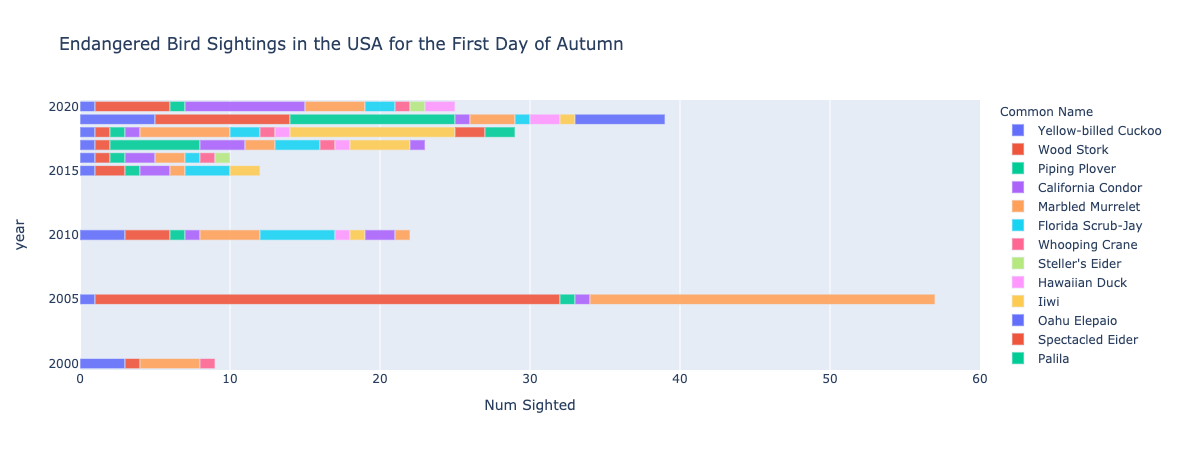

In [94]:
barchart = px.bar(
    endangered_usa_fall_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in the USA for the First Day of Autumn",
)
barchart

### Creating a chart to visualize the change in sightings of endagered birds in the state of Texas over a number of years.

In [90]:
# Bird Sightings in Texas over a number of years.
year_results = []
regionCode = "US-TX"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

tx_df = pd.DataFrame(year_results)


Common Name        Scientific Name      Date Sighted  \
0                   Green Heron    Butorides virescens  2020-09-22 23:09   
1                    Dickcissel        Spiza americana  2020-09-22 23:09   
2     Ruby-throated Hummingbird   Archilochus colubris  2020-09-22 21:19   
3              Great Horned Owl       Bubo virginianus  2020-09-22 20:35   
4                      Blue Jay    Cyanocitta cristata  2020-09-22 20:28   
...                         ...                    ...               ...   
2521         Townsend's Warbler    Setophaga townsendi        2000-09-22   
2522             Summer Tanager          Piranga rubra        2000-09-22   
2523          Northern Cardinal  Cardinalis cardinalis        2000-09-22   
2524             Indigo Bunting       Passerina cyanea        2000-09-22   
2525            Painted Bunting        Passerina ciris        2000-09-22   

                                         Location Name  Num Sighted  \
0                                            Bass Loop          1.0   
1                                            Bass Loop          1.0   
2                   Lakes of Parkway Bylake or Bywater          1.0   
3                                          E Brown Ave          1.0   
4                                        Barry's Place          2.0   
...                                                ...          ...   
2521                 Mackenzie Park, Lubbock (PHP 024)          2.0   
2522  Balcones Canyonlands NWR--Refuge HQ (Travis Co.)          NaN   
2523  Balcones Canyonlands NWR--Refuge HQ (Travis Co.)          NaN   
2524                       Tyrrell Park--Cattail Marsh          NaN   
2525                      Brackenridge Park (Avenue A)          NaN   

       Latitude   Longitude  year  
0     30.549047  -97.663546  2020  
1     30.549047  -97.663546  2020  
2     29.747171  -95.628974  2020  
3     30.365294 -103.659657  2020  
4     29.809506  -95.764204  2020  
...         ...         ...   ...  
2521  33.585600 -101.828715  2000  
2522  30.507111  -98.023946  2000  
2523  30.507111  -98.023946  2000  
2524  30.007423  -94.140043  2000  
2525  29.456112  -98.476110  2000  

[2526 rows x 8 columns]

In [95]:
tx_df.fillna(1, inplace=True)
tx_df

Common Name        Scientific Name      Date Sighted  \
0                   Green Heron    Butorides virescens  2020-09-22 23:09   
1                    Dickcissel        Spiza americana  2020-09-22 23:09   
2     Ruby-throated Hummingbird   Archilochus colubris  2020-09-22 21:19   
3              Great Horned Owl       Bubo virginianus  2020-09-22 20:35   
4                      Blue Jay    Cyanocitta cristata  2020-09-22 20:28   
...                         ...                    ...               ...   
2521         Townsend's Warbler    Setophaga townsendi        2000-09-22   
2522             Summer Tanager          Piranga rubra        2000-09-22   
2523          Northern Cardinal  Cardinalis cardinalis        2000-09-22   
2524             Indigo Bunting       Passerina cyanea        2000-09-22   
2525            Painted Bunting        Passerina ciris        2000-09-22   

                                         Location Name  Num Sighted  \
0                                            Bass Loop          1.0   
1                                            Bass Loop          1.0   
2                   Lakes of Parkway Bylake or Bywater          1.0   
3                                          E Brown Ave          1.0   
4                                        Barry's Place          2.0   
...                                                ...          ...   
2521                 Mackenzie Park, Lubbock (PHP 024)          2.0   
2522  Balcones Canyonlands NWR--Refuge HQ (Travis Co.)          1.0   
2523  Balcones Canyonlands NWR--Refuge HQ (Travis Co.)          1.0   
2524                       Tyrrell Park--Cattail Marsh          1.0   
2525                      Brackenridge Park (Avenue A)          1.0   

       Latitude   Longitude  year  
0     30.549047  -97.663546  2020  
1     30.549047  -97.663546  2020  
2     29.747171  -95.628974  2020  
3     30.365294 -103.659657  2020  
4     29.809506  -95.764204  2020  
...         ...         ...   ...  
2521  33.585600 -101.828715  2000  
2522  30.507111  -98.023946  2000  
2523  30.507111  -98.023946  2000  
2524  30.007423  -94.140043  2000  
2525  29.456112  -98.476110  2000  

[2526 rows x 8 columns]

In [96]:
endangered_tx_fall_df = tx_df[tx_df["Scientific Name"].isin(endangered_usa_list)]
endangered_tx_fall_df

Common Name      Scientific Name      Date Sighted  \
125          Piping Plover   Charadrius melodus  2020-09-22 18:20   
227   Yellow-billed Cuckoo  Coccyzus americanus  2020-09-22 15:43   
257             Wood Stork   Mycteria americana  2020-09-22 13:45   
366   Yellow-billed Cuckoo  Coccyzus americanus  2019-09-22 20:08   
368             Wood Stork   Mycteria americana  2019-09-22 20:08   
657          Piping Plover   Charadrius melodus  2019-09-22 11:20   
846             Wood Stork   Mycteria americana  2018-09-22 18:21   
877          Piping Plover   Charadrius melodus  2018-09-22 17:37   
898   Yellow-billed Cuckoo  Coccyzus americanus  2018-09-22 17:11   
1127         Piping Plover   Charadrius melodus  2017-09-22 19:18   
1154            Wood Stork   Mycteria americana  2017-09-22 19:00   
1389  Yellow-billed Cuckoo  Coccyzus americanus  2017-09-22 09:00   
1451            Wood Stork   Mycteria americana  2016-09-22 19:30   
1661         Piping Plover   Charadrius melodus  2016-09-22 10:35   
1685  Yellow-billed Cuckoo  Coccyzus americanus  2016-09-22 09:24   
1885  Yellow-billed Cuckoo  Coccyzus americanus  2015-09-22 14:55   
1921         Piping Plover   Charadrius melodus  2015-09-22 12:00   
2039            Wood Stork   Mycteria americana  2015-09-22 06:55   
2178  Yellow-billed Cuckoo  Coccyzus americanus  2010-09-22 10:30   
2201            Wood Stork   Mycteria americana  2010-09-22 09:05   
2268         Piping Plover   Charadrius melodus        2010-09-22   
2348            Wood Stork   Mycteria americana  2005-09-22 09:00   
2390  Yellow-billed Cuckoo  Coccyzus americanus  2005-09-22 07:35   

                                          Location Name  Num Sighted  \
125            Galveston--8 mile Beach/Sunny Beach area          1.0   
227       Quintana Neotropical Bird Sanctuary (UTC 121)          1.0   
257                           White Point & Koonce Loop          3.0   
366                           Caddo Lake SP (PPW-E 089)          5.0   
368                           Caddo Lake SP (PPW-E 089)          9.0   
657        Kleberg County Beach N. of National Seashore          8.0   
846     Highway 6, Houston, Texas, US (29.792, -95.646)          1.0   
877   East Cotter Avenue, Port Aransas, Texas, US (2...          1.0   
898       Bentsen-Rio Grande Val. SP--HQ Buildings area          1.0   
1127        Bolivar Flats Shorebird Sanctuary (UTC 058)          6.0   
1154                          Texas A&M--Corpus Christi          1.0   
1389            Resaca de la Palma National Battlefield          1.0   
1451                                          Hwy 44/24          1.0   
1661  South Padre Is.--WBC/Conv. Center/Laguna Madre...         19.0   
1685  Trinity River NWR--Champion Lake (UTC 032B)(te...          1.0   
1885             Edinburg Scenic Wetlands WBC (LTC 061)          1.0   
1921                          Texas City Dike (UTC 074)          1.0   
2039               Salineño Wildlife Preserve (LTC 080)          1.0   
2178                        Lake Weatherford--Northwest          1.0   
2201  Texas-Nueces Co.-Corpus Christi- Bazemore Park...          3.0   
2268  Port Aransas Nature Preserve at Charlie's Pasture          1.0   
2348             Hazel Bazemore Park Hawkwatch Platform          3.0   
2390               Heard Nat. Sci. Mus.& Wildlife Sanct          1.0   

       Latitude  Longitude  year  
125   29.234920 -94.882994  2020  
227   28.933623 -95.308725  2020  
257   27.871062 -97.419934  2020  
366   32.692482 -94.176822  2019  
368   32.692482 -94.176822  2019  
657   27.551294 -97.236375  2019  
846   29.791536 -95.645503  2018  
877   27.835342 -97.047385  2018  
898   26.185606 -98.379940  2018  
1127  29.371137 -94.728708  2017  
1154  27.711305 -97.327538  2017  
1389  25.937467 -97.486528  2017  
1451  27.784075 -97.603751  2016  
1661  26.140091 -97.174823  2016  
1685  29.920977 -94.799020  2016  
1885  26.290582 -98.135191  2015  
1921  29.383895 -94.867115  2015  

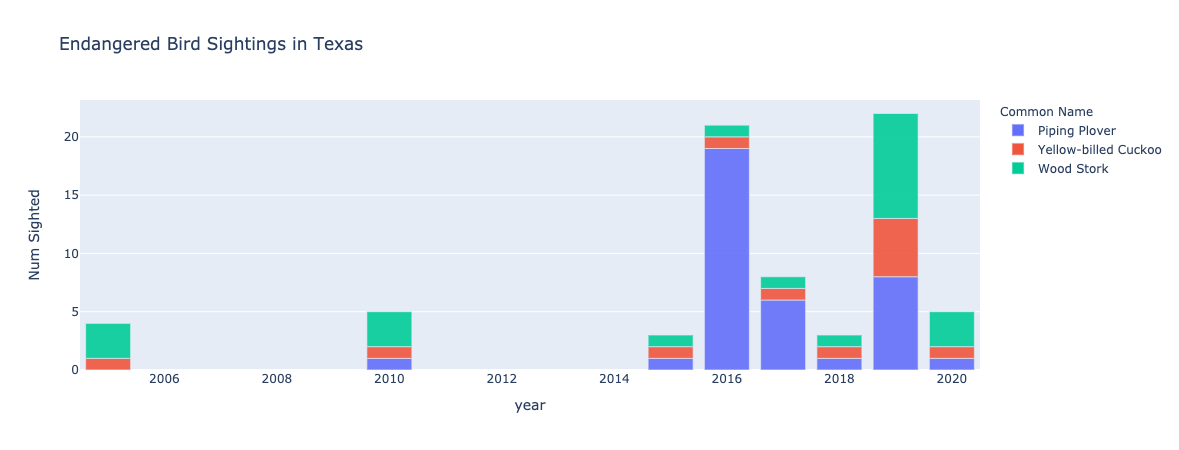

In [97]:
barchart = px.bar(
    endangered_tx_fall_df,
    x="year",
    y="Num Sighted",
    color="Common Name",
    opacity=0.9,
    orientation="v",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in Texas",
)
barchart

In [110]:
fig = px.scatter_mapbox(
    endangered_tx_fall_df,
    lat="Latitude",
    lon="Longitude",
    color="Common Name",
    hover_data=["Common Name", "Scientific Name", "Location Name", "year"],
    title="Endangered Bird Sightings in Texas (2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020)",
    height=750,
    zoom=4.5,
    animation_frame="year",
)

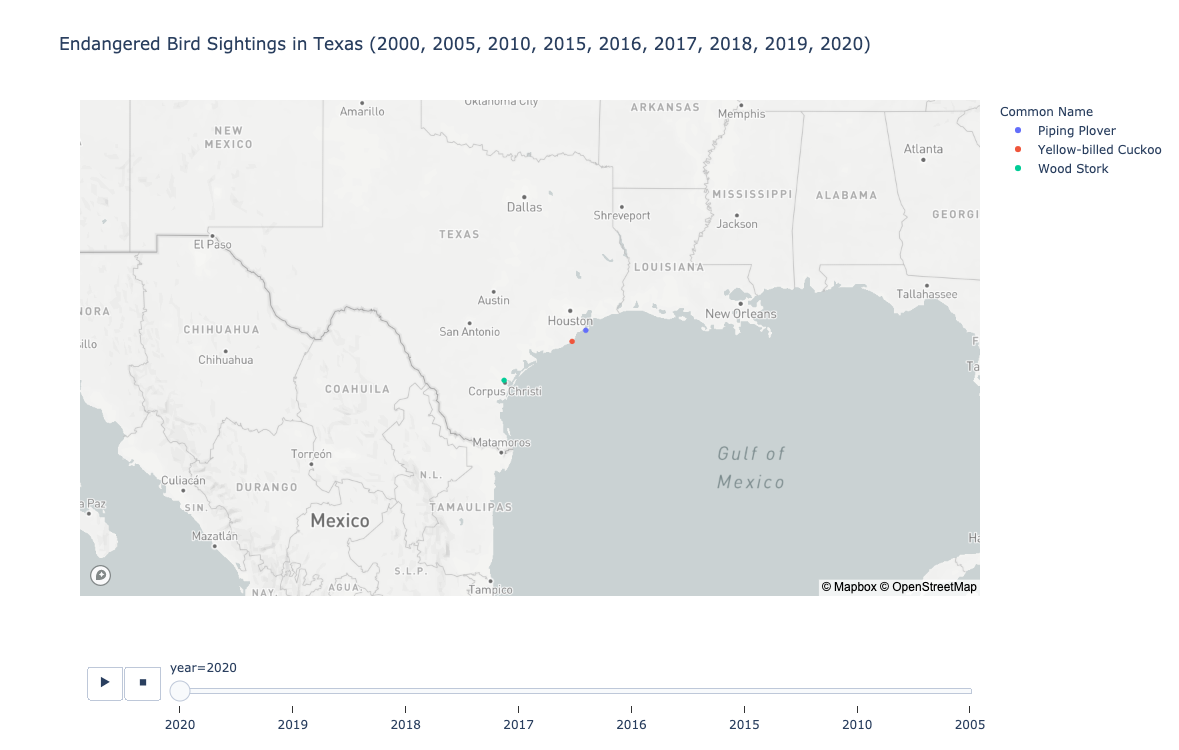

In [111]:
fig.show()

![Endangered Texas Birds](Resources/Images/Endangered_Texas.png)